# Who are the innovators?
Natalia Vélez, November 2020

In [1]:
%matplotlib inline

import os,re,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

Families included in analysis:

In [35]:
fam_df = pd.read_csv('../2_demographics/outputs/family_generations.tsv', sep='\t')
included_families = fam_df[['family']]
print(fam_df.shape)
fam_df.head()

(471336, 3)


,family,avatar,gen
0,time-1584155688_eve-2783193_name-JESUS,2783193,0
1,time-1584155688_eve-2783193_name-JESUS,2783246,1
2,time-1584155688_eve-2783193_name-JESUS,2783231,1
3,time-1584155688_eve-2783193_name-JESUS,2783221,1
4,time-1584155688_eve-2783193_name-JESUS,2783313,2


Family discoveries:

In [17]:
discovery_df = pd.read_csv('outputs/family_discoveries.tsv', sep='\t')
discovery_df['avatar'] = discovery_df['avatar'].astype(np.int)
discovery_df = pd.merge(discovery_df, fam_df)
print(discovery_df.shape)
discovery_df.head()

(2029427, 7)


,seed,family,avatar,object_id,t_epoch,count,gen
0,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,236,1.573896e+09,1,0
1,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,134,1.573896e+09,2,0
2,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2873,1.573896e+09,3,0
3,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2742,1.573896e+09,4,0
4,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2861,1.573896e+09,5,0


Player expertise:

In [31]:
expert_df = pd.read_csv('../2_demographics/outputs/player_expertise.tsv', sep='\t')
expert_df = expert_df[['avatar', 'player', 'gametime']]
expert_df = pd.merge(expert_df, fam_df)

print(expert_df.shape)
expert_df.head()

(470361, 5)


,avatar,player,gametime,family,gen
0,2783339,0002e5ea5ce7cfd761135d255a245a3344af4377,0.00,time-1584061498_eve-2779667_name-SLINKEY,60
1,2783430,0002e5ea5ce7cfd761135d255a245a3344af4377,60.00,time-1584095324_eve-2781053_name-ARGENTINA,43
2,2784552,0002e5ea5ce7cfd761135d255a245a3344af4377,83.77,time-1584176952_eve-2783860_name-EZEKIEL,13
3,2784998,0002e5ea5ce7cfd761135d255a245a3344af4377,115.76,time-1584064999_eve-2780063_name-GOLD,91
4,2785147,0002e5ea5ce7cfd761135d255a245a3344af4377,175.84,time-1584176952_eve-2783860_name-EZEKIEL,23


Individual player discoveries:

In [36]:
player_discoveries[~np.isfinite(player_discoveries['gametime'])]

,family,avatar,gen,count,player,gametime,is_eve
10147,time-1574701840_eve-2331249_name-DAVIDSON,2334051,29,1.0,NaN,NaN,False
10313,time-1574741327_eve-2333788_name-MUSICANT,2334022,3,23.0,NaN,NaN,False
10314,time-1574741327_eve-2333788_name-MUSICANT,2334043,3,12.0,NaN,NaN,False
30801,time-1576295920_eve-2409281_name-SALEM,2409579,5,17.0,NaN,NaN,False
30802,time-1576295920_eve-2409281_name-SALEM,2409580,4,5.0,NaN,NaN,False
...,...,...,...,...,...,...,...
211137,time-1599447278_eve-3308179_name-MATSU,3308601,9,9.0,NaN,NaN,False
211138,time-1599447278_eve-3308179_name-MATSU,3308602,9,1.0,NaN,NaN,False
211139,time-1599447278_eve-3308179_name-MATSU,3308603,10,3.0,NaN,NaN,False
211176,time-1599454213_eve-3308371_name-LUNA,3308589,6,6.0,NaN,NaN,False


In [34]:
# Discoveries contributed & expertise
player_discoveries = discovery_df.groupby(['family', 'avatar', 'gen'])['count'].agg('count').reset_index()
player_discoveries = pd.merge(player_discoveries, expert_df, how='outer')
print(player_discoveries.shape)

# # Separate eves from non-eves
player_discoveries['is_eve'] = player_discoveries['gen'] == 0
player_discoveries.head()

(470832, 6)


,family,avatar,gen,count,player,gametime,is_eve
0,time-1573895755_eve-2276905_name-ZABICKI,2276905,0,100.0,6290670c4fe41726873b54d070b869fdcc9e06e7,9868.12,True
1,time-1573895755_eve-2276905_name-ZABICKI,2276906,1,18.0,d74e306b2dc466835e85acf5b53a4391e2346857,7418.19,False
2,time-1573895755_eve-2276905_name-ZABICKI,2276909,1,49.0,b0527ef2371111cb11369f4a5fe021c1bdb06ed9,16161.38,False
3,time-1573895755_eve-2276905_name-ZABICKI,2276914,1,54.0,e417361f8e2770a2a5647353af05f6e621be69c0,705.81,False
4,time-1573895755_eve-2276905_name-ZABICKI,2276922,1,9.0,0c7bc0236deae0bb888f63c4f4d94f4ab7cefad1,1960.35,False


## Measure of number of innovations

Raw counts:

In [30]:
expert_df

,avatar,player,gametime
0,630641,00006debdd4d630a4a5aa395135a70a69e0db01e,0.00
1,630737,00006debdd4d630a4a5aa395135a70a69e0db01e,13.88
2,630799,00006debdd4d630a4a5aa395135a70a69e0db01e,18.86
3,214206,0001394319e5e63bb74219fef647e9ff24507a21,0.00
4,214530,0001394319e5e63bb74219fef647e9ff24507a21,33.78
...,...,...,...
3151901,1668930,fffb5739f98845775065502fd92ea45cca82c183,47.19
3151902,1833922,fffb5739f98845775065502fd92ea45cca82c183,96.52
3151903,1834103,fffb5739f98845775065502fd92ea45cca82c183,109.65
3151904,3105803,fffc86d22634b309cdaa8420fa6530b1fda64766,0.00


<AxesSubplot:xlabel='count'>

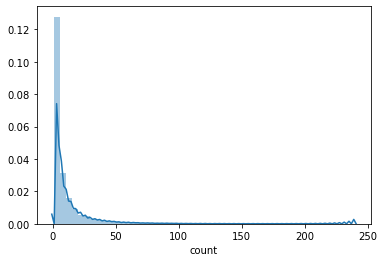

In [26]:
sns.distplot(player_discoveries['count'])

Log-transformed:

<AxesSubplot:xlabel='count'>

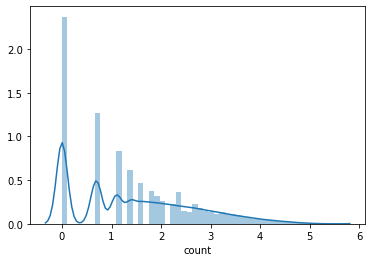

In [28]:
sns.distplot(np.log(player_discoveries['count']))

<AxesSubplot:xlabel='is_eve', ylabel='count'>

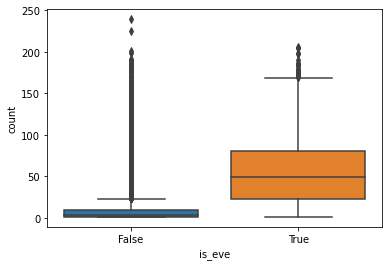

In [25]:
sns.boxplot(data=player_discoveries, x='is_eve', y='count')

## Are innovators more experienced in the game?